In [1]:
# Basic libraries to manipulate data
import numpy as np #Numpy for numerical computations
import pandas as pd #Pandas for data manipulation
import matplotlib.pyplot as plt #Matplotlib for data visualization
import matplotlib.ticker as ticker
import seaborn as sns #Seaborn for data visualization
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf


#Ignore warnings
import warnings
warnings.filterwarnings("ignore") # This is to ignore any warnings that might pop up during execution

In [2]:
# Specify the path to the datasets
data_path = "./data/"

# Specify the filenames of the datasets
Metadata_filename = "Metadata.xlsx"
Production_filename = "Production Data.xlsx"

# Read the Excel files
metadata_df = pd.read_excel(data_path + Metadata_filename)
production_df = pd.read_excel(data_path + Production_filename)

# Create working copies of the dataframes for analysis
metadata_df_copy = metadata_df.copy()
production_df_copy = production_df.copy()

In [3]:
# Count missing values in each column for Production DataFrame
production_missing_values = production_df_copy.isnull().sum()
print("\nMissing values in Production DataFrame:")
print(production_missing_values)


Missing values in Production DataFrame:
WellID                                        0
CompletionID                                  0
API_UWI                                       0
WellName                                      0
WellboreId                                    0
ProducingMonth                                0
TotalProdMonths                               0
TotalCompletionMonths                         0
ProducingDays                                 0
Prod_BOE                                      0
Prod_MCFE                                     0
LiquidsProd_BBL                               0
GasProd_MCF                                   0
WaterProd_BBL                                 0
RepGasProd_MCF                                0
CDProd_BOEPerDAY                              0
CDProd_MCFEPerDAY                             0
CDLiquids_BBLPerDAY                           0
CDGas_MCFPerDAY                               0
CDWater_BBLPerDAY                             0

In [4]:
columns_to_retain = ['API_UWI', 'WellName', 'ProducingMonth', 'TotalProdMonths', 'Prod_BOE', 
                     'Prod_MCFE', 'LiquidsProd_BBL', 'GasProd_MCF', 'WaterProd_BBL', 
                     'RepGasProd_MCF', 'ProductionReportedMethod', 'ProducingOperator', 'ENVProdID']

# Retain only the specified columns
production_df = production_df[columns_to_retain]

In [5]:
# Set pandas display option to show all rows
pd.set_option('display.max_rows', None)

metadata_missing_values = metadata_df.isnull().sum()

# Print missing values in Metadata DataFrame
print("Missing values in Metadata DataFrame:")
print(metadata_missing_values)

# Reset pandas display option to default
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 


Missing values in Metadata DataFrame:
API_UWI                                            0
Unformatted_API_UWI                                0
API_UWI_12                                         0
Unformatted_API_UWI_12                             0
API_UWI_14                                         0
Unformatted_API_UWI_14                             0
WellID                                             0
CompletionID                                       0
WellPadID                                          0
WellPadDirection                                  17
ENVWellGrouping                                 2863
CompletionNumber                                  18
WellName                                           0
Country                                            0
StateProvince                                      0
County                                             0
Lease                                              0
LeaseName                                          0
ENVOpera

In [6]:
columns_to_retain = [
    'API_UWI',
    'County',
    'CumProd_BOEPer1000FT',
    'CumGas_MCFPer1000FT',
    'CumProd_MCFEPer1000FT',
    'CumOil_BBLPer1000FT',
    'TotalProducingMonths',
    'Isopach_FT',
    'GammaRay_API',
    'BulkDensity_GPerCC',
    'Resistivity_OHMSM',
    'DensityPorosity_PCT',
    'EffectivePorosity_PCT',
    'ClayVolume_PCT',
    'NonClayVolume_PCT',
    'WaterSaturation_PCT',
    'PhiH_FT',
    'HCPV_PCT',
    'HeightOfHCPV_FT'
]
# Retain only the specified columns
metadata_df = metadata_df[columns_to_retain]

In [7]:
metadata_df.columns

Index(['API_UWI', 'County', 'CumProd_BOEPer1000FT', 'CumGas_MCFPer1000FT',
       'CumProd_MCFEPer1000FT', 'CumOil_BBLPer1000FT', 'TotalProducingMonths',
       'Isopach_FT', 'GammaRay_API', 'BulkDensity_GPerCC', 'Resistivity_OHMSM',
       'DensityPorosity_PCT', 'EffectivePorosity_PCT', 'ClayVolume_PCT',
       'NonClayVolume_PCT', 'WaterSaturation_PCT', 'PhiH_FT', 'HCPV_PCT',
       'HeightOfHCPV_FT'],
      dtype='object')

In [8]:
metadata_df.head()

,API_UWI,County,CumProd_BOEPer1000FT,CumGas_MCFPer1000FT,CumProd_MCFEPer1000FT,CumOil_BBLPer1000FT,TotalProducingMonths,Isopach_FT,GammaRay_API,BulkDensity_GPerCC,Resistivity_OHMSM,DensityPorosity_PCT,EffectivePorosity_PCT,ClayVolume_PCT,NonClayVolume_PCT,WaterSaturation_PCT,PhiH_FT,HCPV_PCT,HeightOfHCPV_FT
0,30-015-43706,EDDY,107992.0,260983.0,647951.0,64495.0,84.0,220.0,61.08,2.60,94.67,0.064,0.055,0.15,0.80,0.52,12.17,0.029,6.5
1,30-025-44687,LEA,40591.0,52637.0,243544.0,31818.0,47.0,151.0,70.40,2.55,174.31,0.093,0.075,0.16,0.76,0.39,11.33,0.043,6.6
2,30-025-46812,LEA,49143.0,50224.0,294856.0,40772.0,34.0,309.0,74.89,2.56,90.51,0.080,0.061,0.21,0.72,0.46,18.81,0.032,9.9
3,30-025-44013,LEA,64979.0,95748.0,389875.0,49021.0,68.0,85.0,73.86,2.56,91.03,0.088,0.073,0.17,0.76,0.59,6.20,0.031,2.6
4,30-015-49326,EDDY,50108.0,122893.0,300646.0,29625.0,13.0,216.0,81.37,2.59,181.22,0.073,0.060,0.20,0.73,0.41,12.87,0.035,7.6


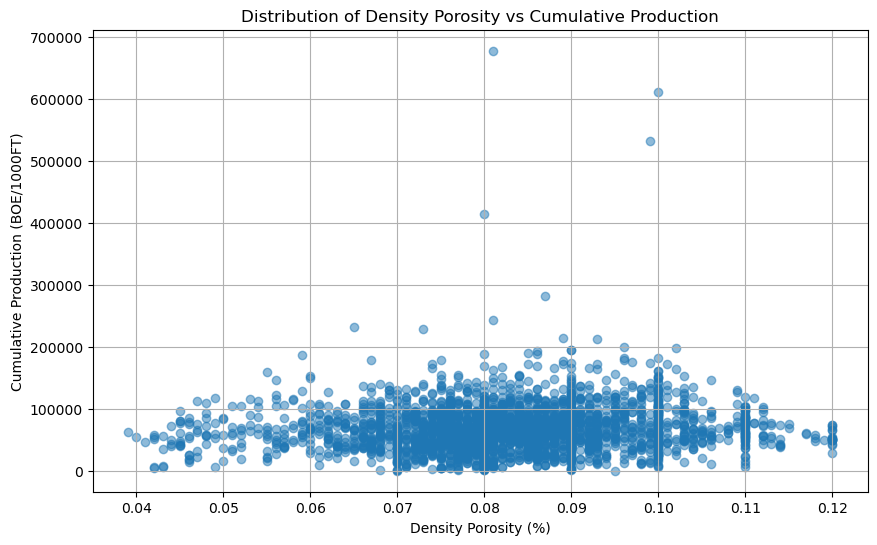

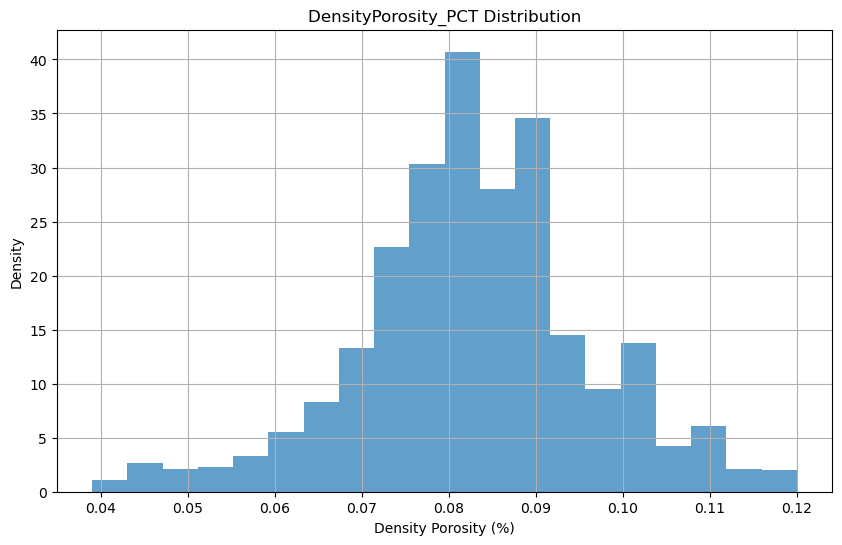

Peak Density Porosity: 0.08
Percentage of data within peak range: 64.47782046804052
t-statistic: -3.6911903810183198
p-value: 0.00022742772301823002


In [9]:
plt.figure(figsize=(10, 6))
plt.scatter( metadata_df['DensityPorosity_PCT'],metadata_df['CumProd_BOEPer1000FT'], alpha=0.5)
plt.title('Distribution of Density Porosity vs Cumulative Production')
plt.xlabel('Density Porosity (%)')
plt.ylabel('Cumulative Production (BOE/1000FT)')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(metadata_df['DensityPorosity_PCT'], bins=20, density=True, alpha=0.7)
plt.title('DensityPorosity_PCT Distribution')
plt.xlabel('Density Porosity (%)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


peak_density_porosity = metadata_df['DensityPorosity_PCT'].mode()[0]
print("Peak Density Porosity:", peak_density_porosity)


peak_range = 0.01  
peak_density_porosity_count = ((metadata_df['DensityPorosity_PCT'] >= peak_density_porosity - peak_range) & 
                               (metadata_df['DensityPorosity_PCT'] <= peak_density_porosity + peak_range)).sum()
total_count = len(metadata_df)
percentage_in_peak_range = peak_density_porosity_count / total_count * 100
print("Percentage of data within peak range:", percentage_in_peak_range)

peak_density_porosity_data = metadata_df[(metadata_df['DensityPorosity_PCT'] >= peak_density_porosity - peak_range) & 
                                         (metadata_df['DensityPorosity_PCT'] <= peak_density_porosity + peak_range)]
other_density_porosity_data = metadata_df[(metadata_df['DensityPorosity_PCT'] < peak_density_porosity - peak_range) | 
                                          (metadata_df['DensityPorosity_PCT'] > peak_density_porosity + peak_range)]

t_stat, p_value = stats.ttest_ind(peak_density_porosity_data['CumProd_BOEPer1000FT'], other_density_porosity_data['CumProd_BOEPer1000FT'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

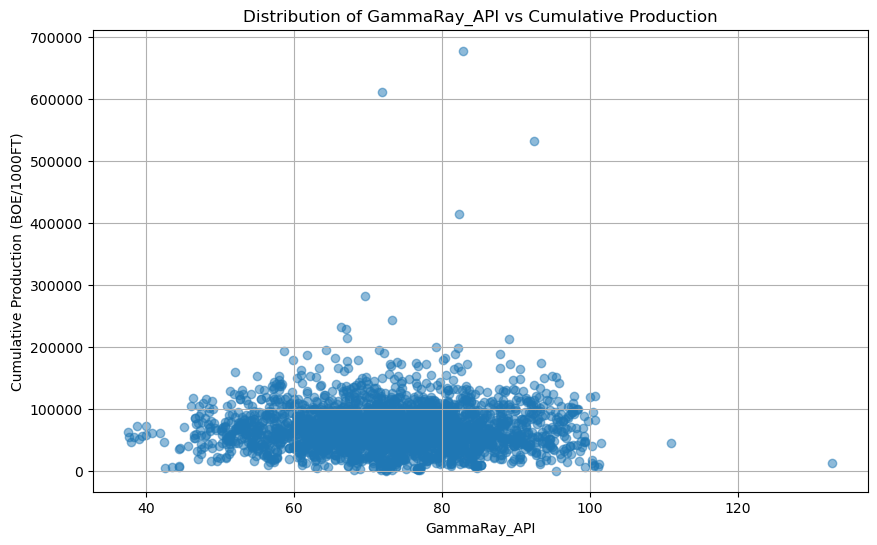

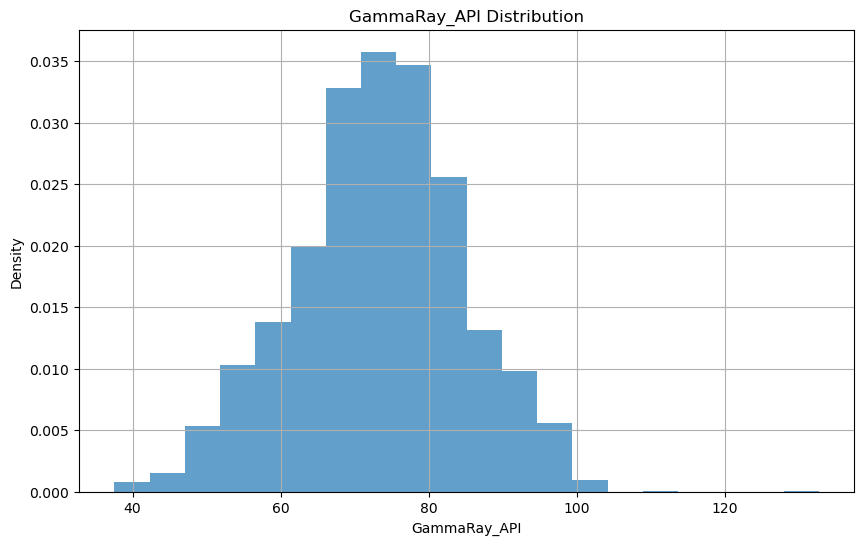

GammaRay_API has a significant difference in cumulative production around its peak.


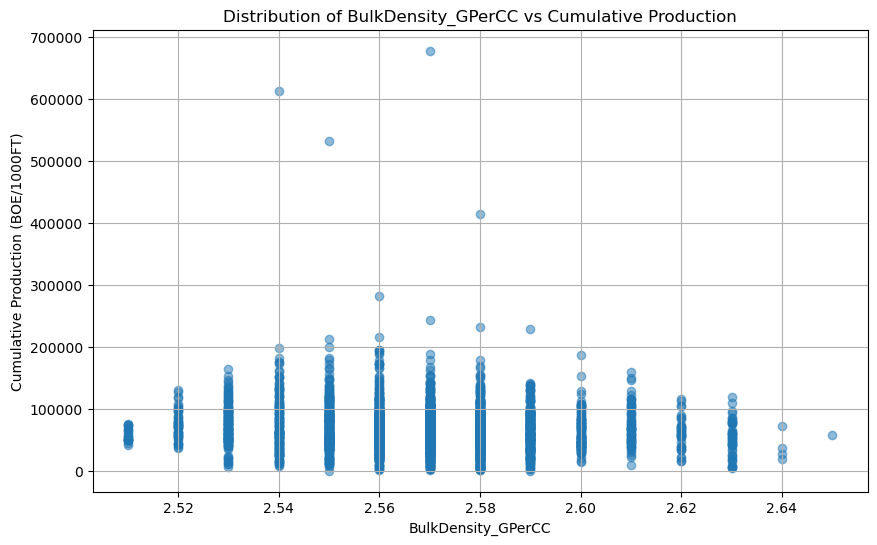

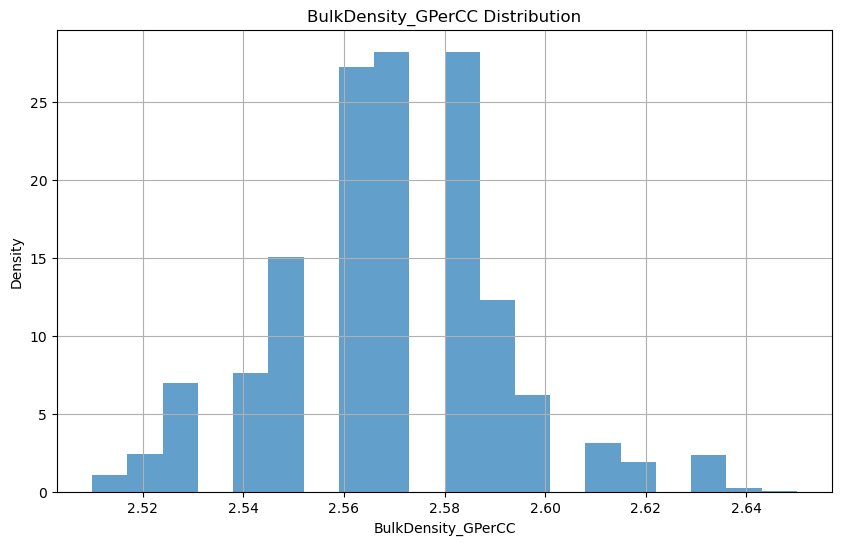

BulkDensity_GPerCC has a significant difference in cumulative production around its peak.


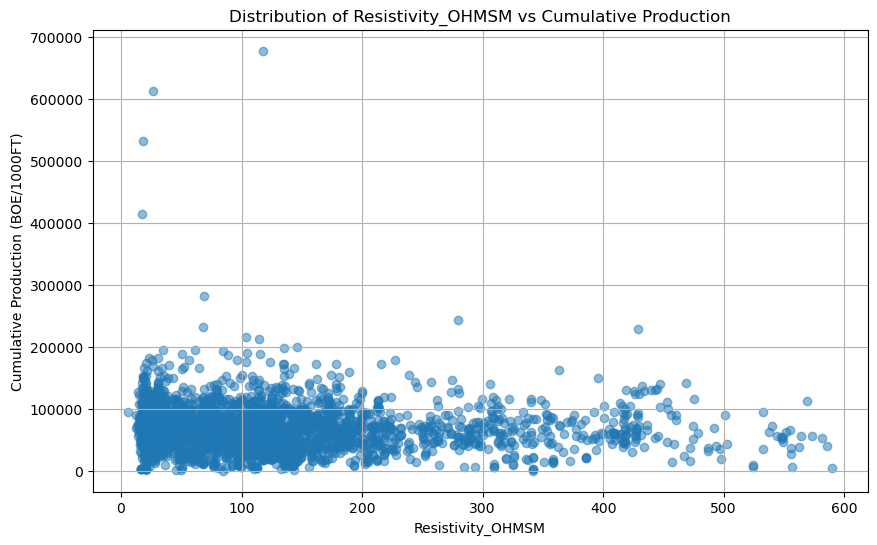

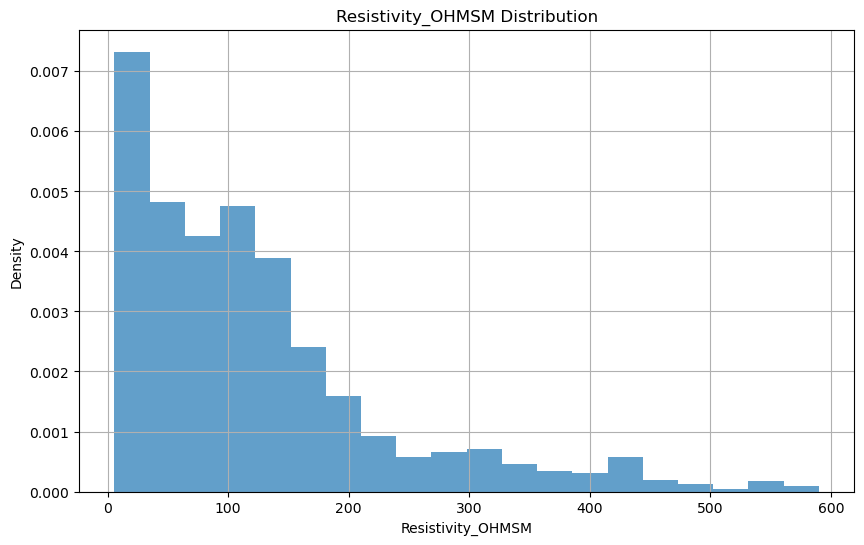

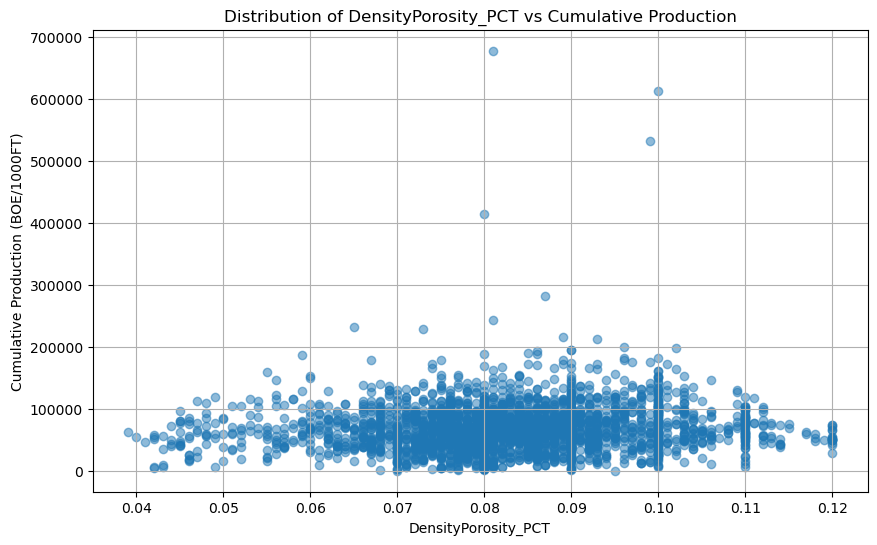

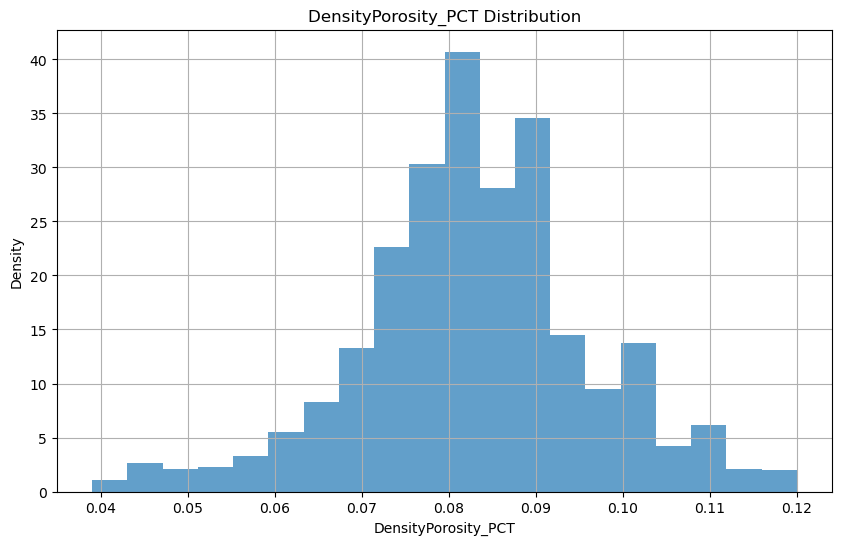

DensityPorosity_PCT has a significant difference in cumulative production around its peak.


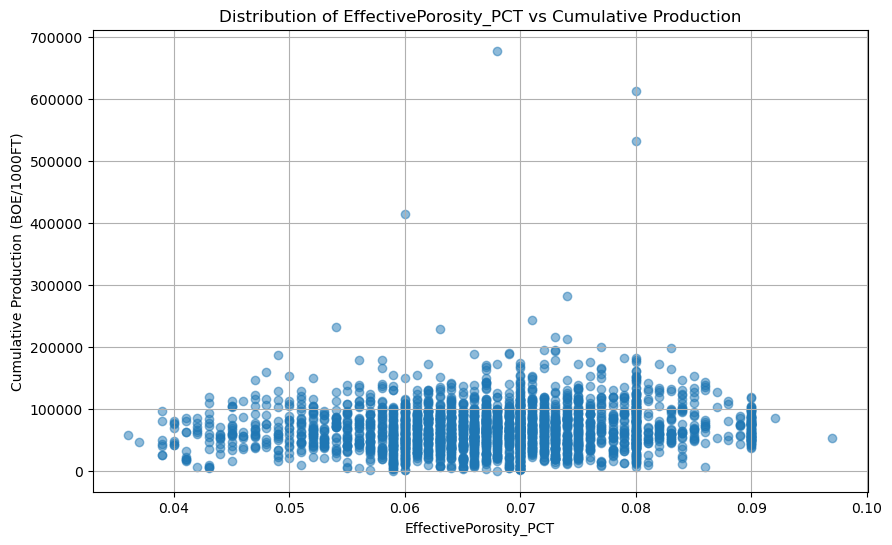

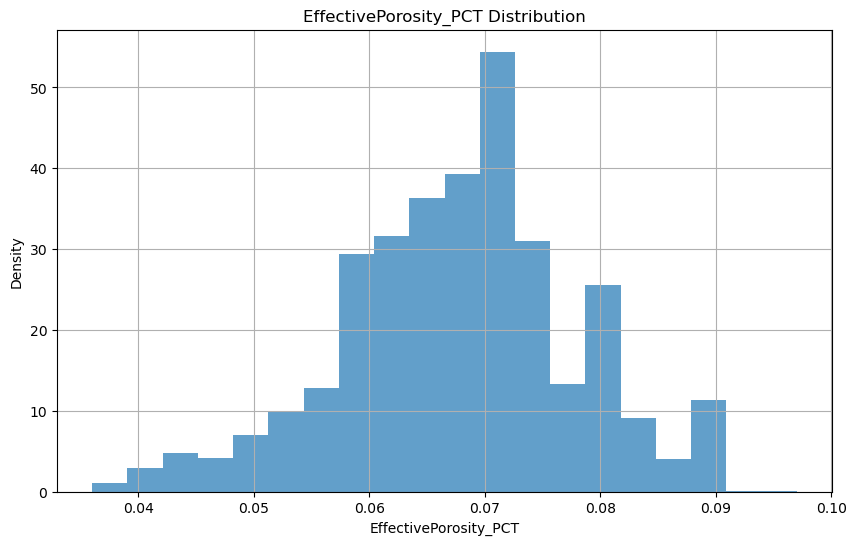

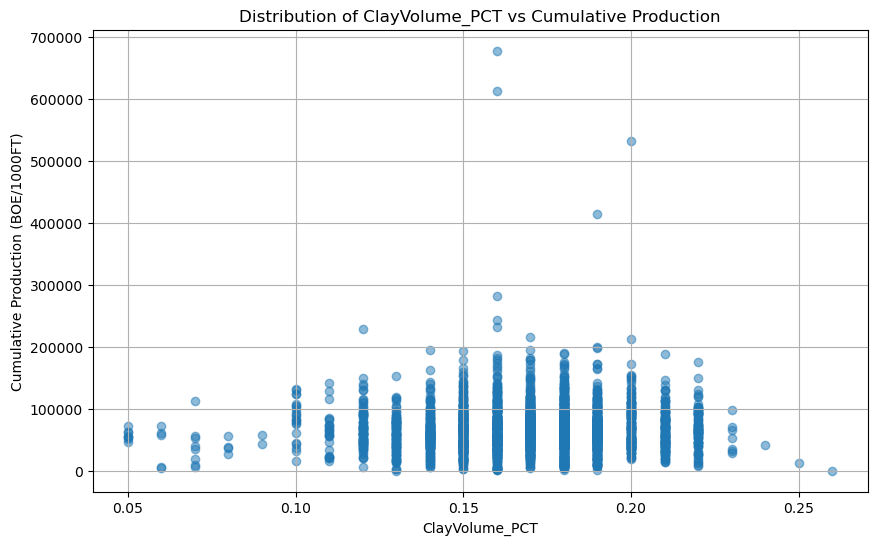

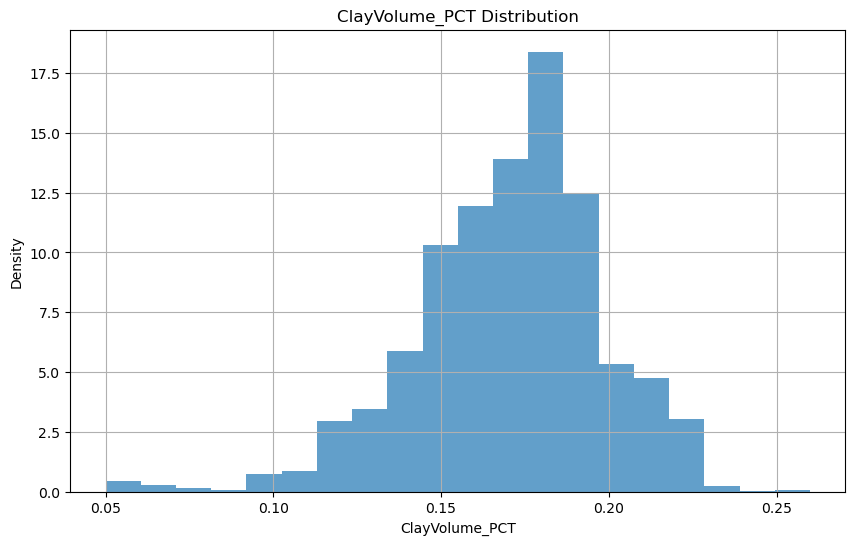

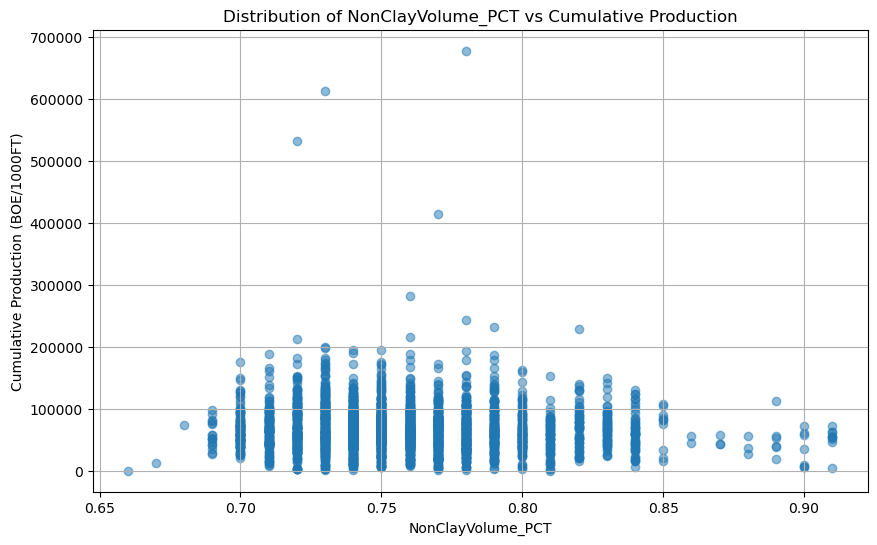

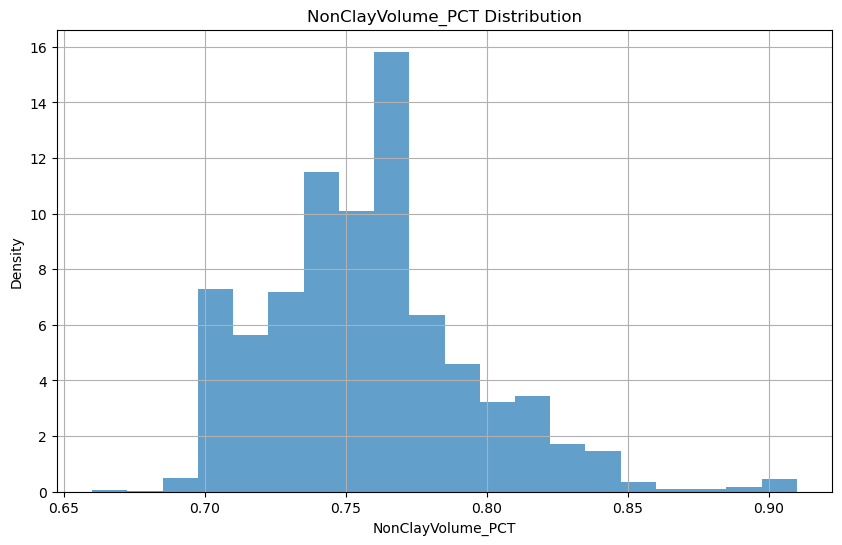

NonClayVolume_PCT has a significant difference in cumulative production around its peak.


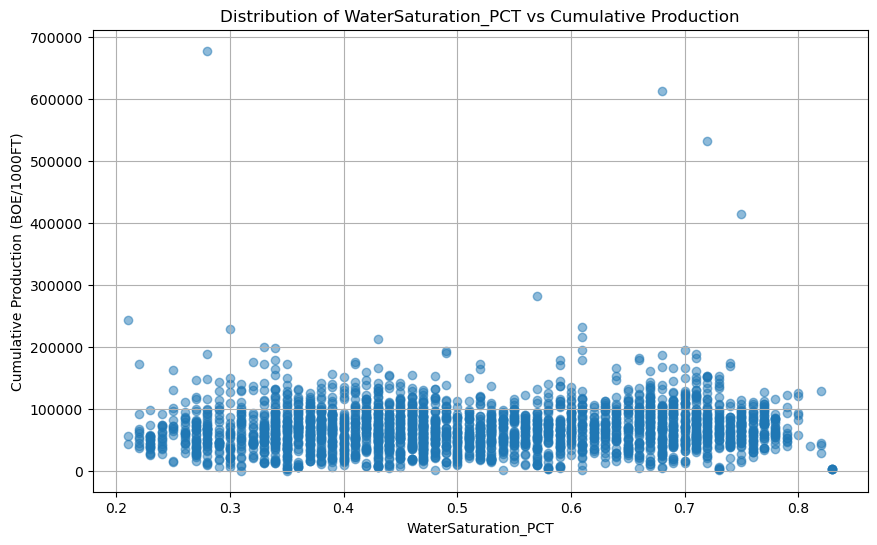

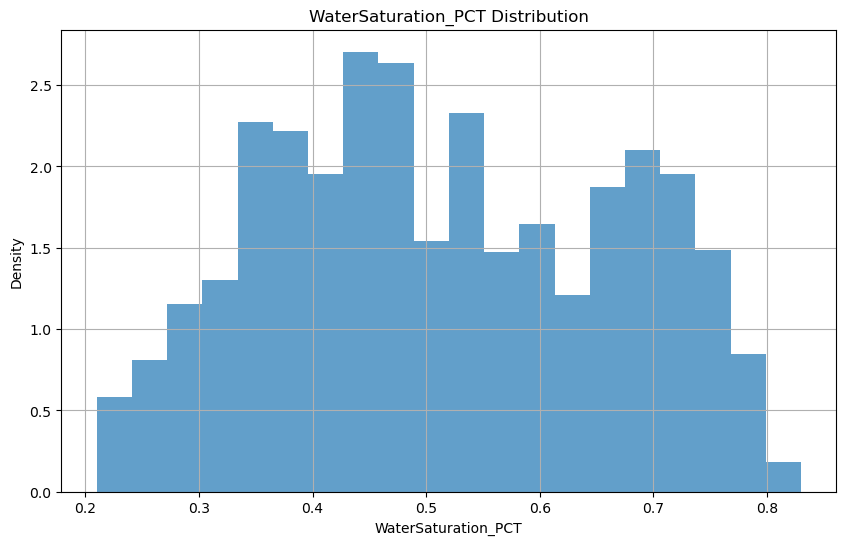

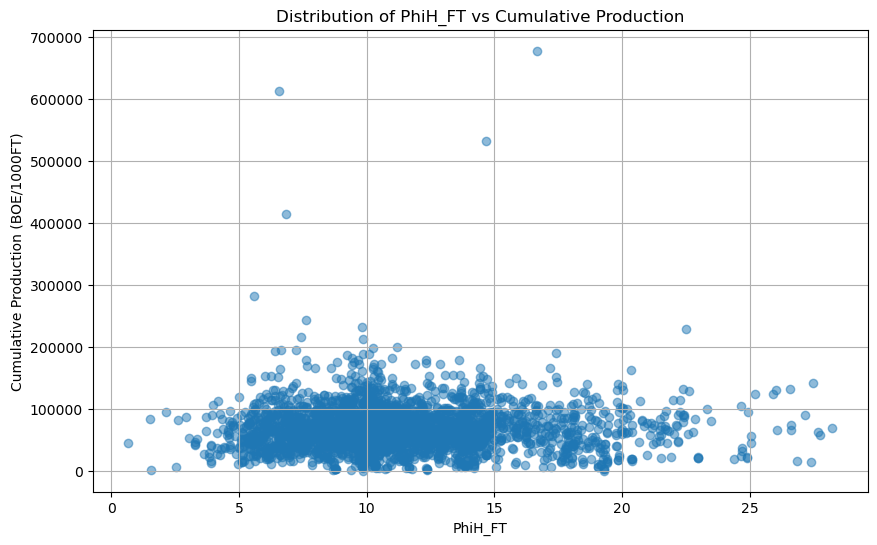

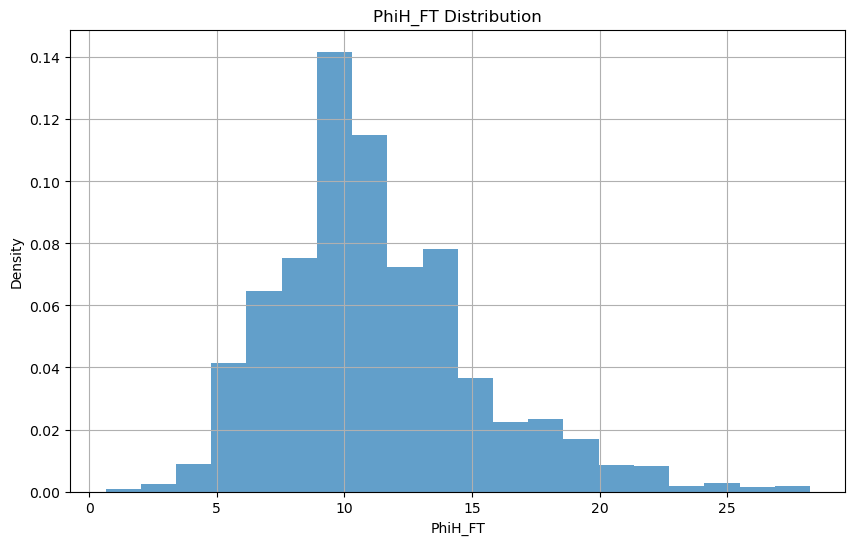

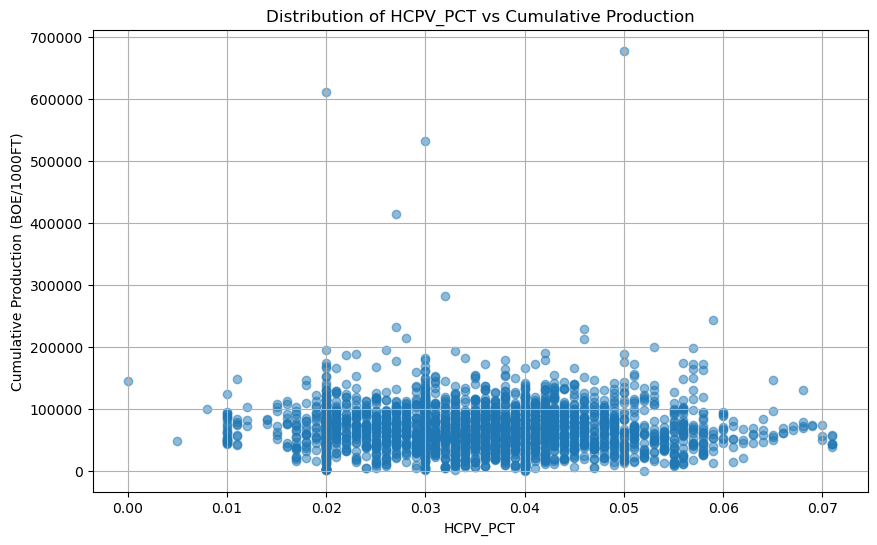

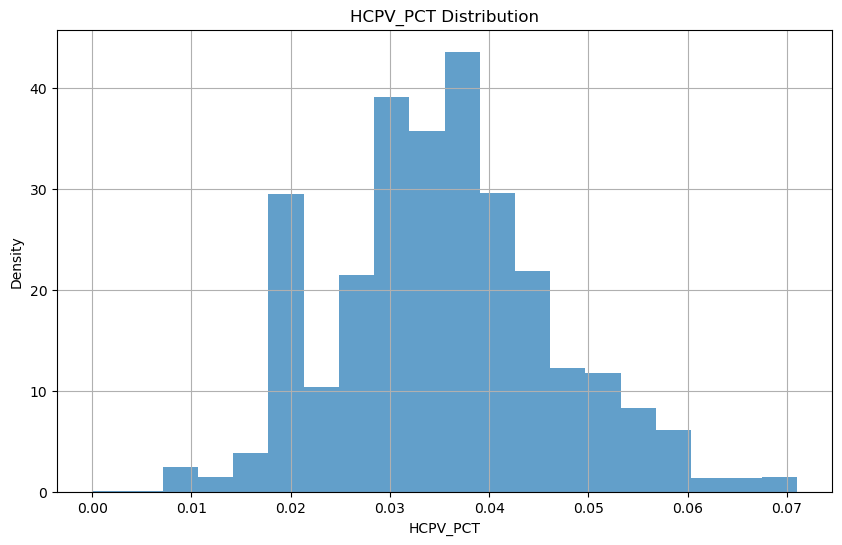

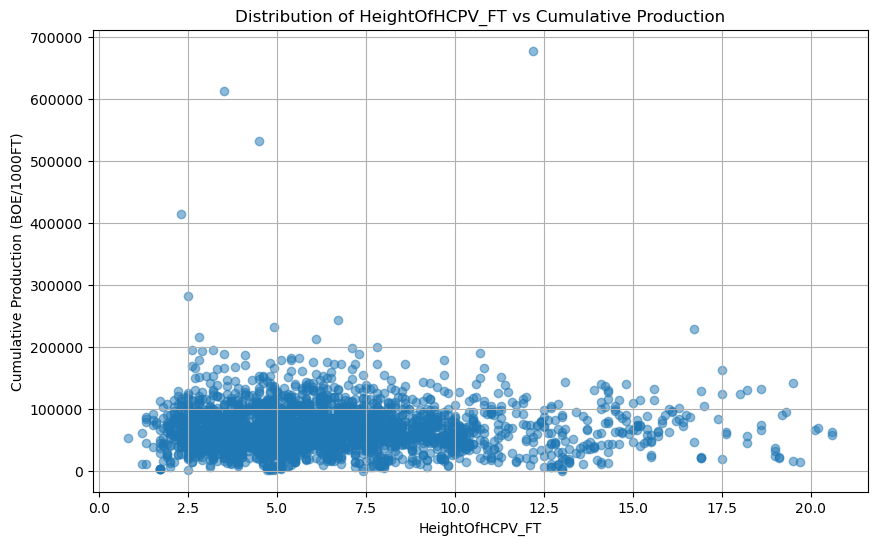

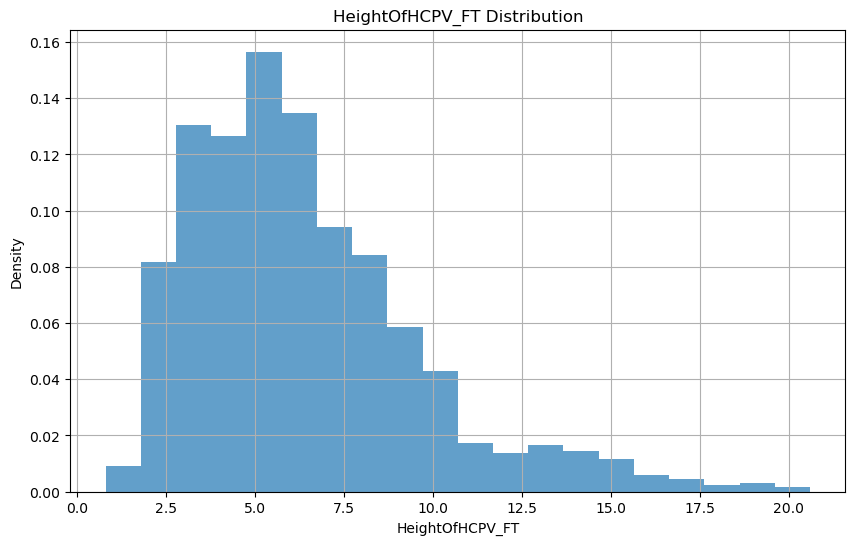

Columns with significant differences in cumulative production: ['GammaRay_API', 'BulkDensity_GPerCC', 'DensityPorosity_PCT', 'NonClayVolume_PCT']


In [10]:
variables = ['GammaRay_API', 'BulkDensity_GPerCC', 'Resistivity_OHMSM', 'DensityPorosity_PCT', 
             'EffectivePorosity_PCT', 'ClayVolume_PCT', 'NonClayVolume_PCT', 'WaterSaturation_PCT', 
             'PhiH_FT', 'HCPV_PCT', 'HeightOfHCPV_FT']

significant_columns = []

for variable in variables:
    plt.figure(figsize=(10, 6))
    plt.scatter(metadata_df[variable], metadata_df['CumProd_BOEPer1000FT'], alpha=0.5)
    plt.title(f'Distribution of {variable} vs Cumulative Production')
    plt.xlabel(variable)
    plt.ylabel('Cumulative Production (BOE/1000FT)')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(metadata_df[variable], bins=20, density=True, alpha=0.7)
    plt.title(f'{variable} Distribution')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

    # 生産量のピークを特定する
    peak_variable = metadata_df[variable].mode()[0]
    peak_range = 0.01  # 0.01の範囲をピークの周りとして定義
    peak_variable_data = metadata_df[(metadata_df[variable] >= peak_variable - peak_range) & 
                                      (metadata_df[variable] <= peak_variable + peak_range)]
    other_variable_data = metadata_df[(metadata_df[variable] < peak_variable - peak_range) | 
                                       (metadata_df[variable] > peak_variable + peak_range)]

    t_stat, p_value = stats.ttest_ind(peak_variable_data['CumProd_BOEPer1000FT'], other_variable_data['CumProd_BOEPer1000FT'])
    
    if p_value < 0.05:
        significant_columns.append(variable)
        print(f"{variable} has a significant difference in cumulative production around its peak.")

print("Columns with significant differences in cumulative production:", significant_columns)


In [11]:
def define_features(input_features):
    """
    Define features for identifying similar wells.
    
    Args:
    - input_features (dict): Dictionary containing input features provided by the customer.
    
    Returns:
    - similar_well_features (list): List containing the selected features for identifying similar wells.
    """
    # Select the relevant features
    similar_well_features = [
        input_features['GammaRay_API'],
        input_features['BulkDensity_GPerCC'],
        input_features['DensityPorosity_PCT'],
        input_features['NonClayVolume_PCT']
    ]
    
    return similar_well_features

In [12]:
from scipy.spatial.distance import euclidean

def calculate_similarity(input_features, other_features):
    # Calculate Euclidean distance between input_features and other_features
    similarity = euclidean(input_features, other_features)
    return similarity

In [13]:
other_features_df = metadata_df[['GammaRay_API', 'BulkDensity_GPerCC', 'DensityPorosity_PCT', 'NonClayVolume_PCT']]
other_features_df.dropna(inplace=True)

In [14]:
# NaN値と無限大を持つ行を削除する
other_features_df = other_features_df.replace([np.inf, -np.inf], np.nan)
other_features_df = other_features_df.dropna()

# NaN値と無限大が存在するかを確認する
print(other_features_df.isin([np.inf, -np.inf]).any())

GammaRay_API           False
BulkDensity_GPerCC     False
DensityPorosity_PCT    False
NonClayVolume_PCT      False
dtype: bool


In [15]:

# CLIENTS INPUTS FOR PARAMETER OF THE WELL 
customer_input = {
    'GammaRay_API': 60.08,
    'BulkDensity_GPerCC': 1.50,
    'DensityPorosity_PCT': 0.084,
    'NonClayVolume_PCT': 0.40
}

In [16]:
from scipy.spatial.distance import euclidean

def calculate_similarity(input_features, other_features):
    # Calculate Euclidean distance between input_features and other_features
    similarity = euclidean(input_features, other_features)
    return similarity


# Other featuresをnumpy arrayに変換
other_features_array = other_features_df.to_numpy()

# 入力特徴量をnumpy arrayに変換
input_features_array = np.array(list(customer_input.values()))

# 類似度の計算
similarities = []
for other_feature_set in other_features_array:
    similarity = calculate_similarity(input_features_array, other_feature_set)
    similarities.append(similarity)

# 最も類似した油井を特定
most_similar_index = np.argmin(similarities)
most_similar_well = metadata_df.iloc[most_similar_index]

print("Most similar well:")
print(most_similar_well)

Most similar well:
API_UWI                  30-015-48297
County                           EDDY
CumProd_BOEPer1000FT          47749.0
CumGas_MCFPer1000FT          111901.0
CumProd_MCFEPer1000FT        286495.0
CumOil_BBLPer1000FT           29099.0
TotalProducingMonths             15.0
Isopach_FT                      158.0
GammaRay_API                    55.37
BulkDensity_GPerCC                2.6
Resistivity_OHMSM              104.18
DensityPorosity_PCT             0.065
EffectivePorosity_PCT           0.055
ClayVolume_PCT                   0.14
NonClayVolume_PCT                 0.8
WaterSaturation_PCT              0.56
PhiH_FT                          8.66
HCPV_PCT                        0.028
HeightOfHCPV_FT                   4.4
Name: 462, dtype: object


In [17]:
most_similar_well_API_UWI = most_similar_well['API_UWI']

selected_well_production = production_df[production_df['API_UWI'] == most_similar_well_API_UWI]
selected_well_production



,API_UWI,WellName,ProducingMonth,TotalProdMonths,Prod_BOE,Prod_MCFE,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,RepGasProd_MCF,ProductionReportedMethod,ProducingOperator,ENVProdID
17459,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2022-07-01,1,116,697,30,517,1003,0,REPORTED,"TAP ROCK OPERATING, LLC",1
17460,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2022-08-01,2,34778,208670,22759,72116,87503,0,REPORTED,"TAP ROCK OPERATING, LLC",1
17461,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2022-09-01,3,33661,201967,22208,68719,80921,0,REPORTED,"TAP ROCK OPERATING, LLC",1
17462,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2022-10-01,4,23369,140211,12068,67803,49151,0,REPORTED,"TAP ROCK OPERATING, LLC",1
17463,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2022-11-01,5,23357,140141,15309,48287,52569,0,REPORTED,"TAP ROCK OPERATING, LLC",1
17464,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2022-12-01,6,22614,135685,13013,57607,41624,0,REPORTED,"TAP ROCK OPERATING, LLC",1
17465,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2023-01-01,7,16143,96860,10445,34190,25603,0,REPORTED,OXY USA INC,1
17466,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2023-02-01,8,14696,88174,9269,32560,33945,0,REPORTED,OXY USA INC,1
17467,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2023-03-01,9,15274,91642,8921,38116,33518,0,REPORTED,OXY USA INC,1
17468,30-015-48297,CYPRESS 33 FEDERAL COM 207H,2023-04-01,10,12605,75631,7261,32065,29674,0,REPORTED,OXY USA INC,1


In [18]:
selected_well_production[['TotalProdMonths', 'Prod_BOE']]

,TotalProdMonths,Prod_BOE
17459,1,116
17460,2,34778
17461,3,33661
17462,4,23369
17463,5,23357
17464,6,22614
17465,7,16143
17466,8,14696
17467,9,15274
17468,10,12605


In [19]:
model = ARIMA(selected_well_production['Prod_BOE'], order=(1,1,1))
model_fit = model.fit()
aic = model_fit.aic

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Prod_BOE   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -148.664
Date:                Tue, 27 Feb 2024   AIC                            303.328
Time:                        21:57:55   BIC                            305.245
Sample:                             0   HQIC                           303.150
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8018      0.599     -1.339      0.181      -1.976       0.372
ma.L1          1.0000      0.327      3.060      0.002       0.360       1.640
sigma2      9.202e+07   3.55e-09   2.59e+16      0.0

In [20]:
# CLIENT'S INPUTs ( Assume that they want to predict the well (Let's say Total Months: 15 months))

sample = {
    'TotalProdMonths': list(range(1, 16)),
    'Prod_BOE': [116, 34778, 33661, 23369, 23357, 22614, 16143, 14696, 15274, 12605, 7056, 7955, 8825, 7488, 6893]
}


# Create DataFrame
sample = pd.DataFrame(sample)
sample

,TotalProdMonths,Prod_BOE
0,1,116
1,2,34778
2,3,33661
3,4,23369
4,5,23357
5,6,22614
6,7,16143
7,8,14696
8,9,15274
9,10,12605


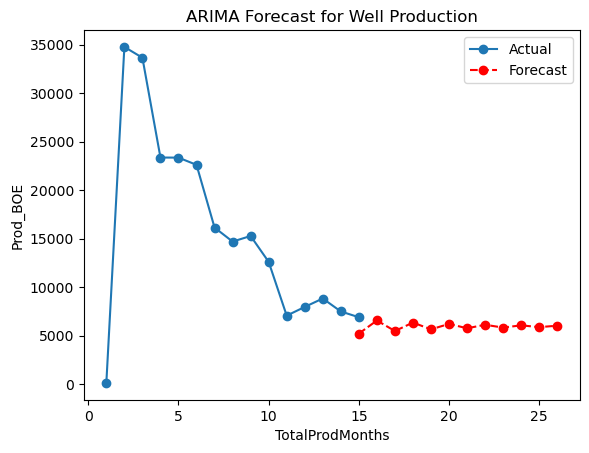

In [21]:

forecast = model_fit.forecast(steps=12)  


forecast_data = {
    'TotalProdMonths': list(range(15, 27)),  
    'Prod_BOE': forecast 
}
forecast_df = pd.DataFrame(forecast_data)

# 元のデータと予測データを結合
combined_df = pd.concat([sample, forecast_df])

# グラフの描画
plt.plot(sample['TotalProdMonths'], sample['Prod_BOE'], marker='o', label='Actual')
plt.plot(forecast_df['TotalProdMonths'], forecast_df['Prod_BOE'], linestyle='--', marker='o', color='red', label='Forecast')
plt.xlabel('TotalProdMonths')
plt.ylabel('Prod_BOE')
plt.title('ARIMA Forecast for Well Production')
plt.legend()
plt.show()